In [39]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.dates import date2num
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## Condos CSV

# Read CSV
condos_df = pd.read_csv('/Users/faisalhossain/PycharmProjects/Miami-ML/data/condos.csv')
del condos_df["StateName"]
miami_condos_df = condos_df[condos_df["Metro"] == "Miami-Fort Lauderdale-West Palm Beach"]

miami_condos_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,1/31/00,2/29/00,...,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22
121,124381,134,Flagami,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,75689.0,76063.0,...,182571.0,185374.0,188026.0,190355.0,193537.0,196396.0,199930.0,202928.0,208014.0,213124
127,269072,142,Little Havana,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,85415.0,85603.0,...,186930.0,189428.0,192445.0,195758.0,199807.0,202847.0,206413.0,208877.0,213941.0,219143
172,269228,190,Alameda - West Flagler,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,95084.0,95268.0,...,199807.0,203616.0,207055.0,210996.0,214659.0,217837.0,220257.0,222513.0,227527.0,233381
198,123423,220,Allapattah,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,108714.0,108565.0,...,174923.0,177794.0,180321.0,182751.0,186486.0,189622.0,193846.0,197279.0,203645.0,209279
218,268938,240,Coral Way,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,122942.0,123113.0,...,284164.0,289149.0,294029.0,299379.0,305622.0,310966.0,317094.0,323029.0,332180.0,342727


In [3]:
miami_condos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 121 to 4129
Columns: 278 entries, RegionID to 6/30/22
dtypes: float64(269), int64(3), object(6)
memory usage: 374.9+ KB


In [4]:
# Identify Null Values
null_df = miami_condos_df[miami_condos_df.isna().any(axis=1)]
null_df

# Null value perctange
(len(null_df.index) / len(miami_condos_df.index)) * 100

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,1/31/00,2/29/00,...,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22
268,220532,309,Central,Neighborhood,FL,North Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,49521.0,49703.0,...,125773.0,128119.0,130544.0,132736.0,134766.0,137175.0,140192.0,143575.0,147388.0,152191
311,269071,362,Little Haiti,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,NaN,NaN,...,130884.0,133688.0,136164.0,139432.0,142492.0,144005.0,147884.0,150254.0,153903.0,157633
426,269093,518,Liberty City,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,NaN,NaN,...,169292.0,170758.0,172052.0,171247.0,176956.0,180575.0,187335.0,191497.0,198435.0,204043
1281,276638,1833,Water Catchment Area,Neighborhood,FL,West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,NaN,NaN,...,182619.0,186838.0,191081.0,195147.0,199841.0,204620.0,212288.0,218929.0,227530.0,233798
1328,124068,1919,Cresthaven,Neighborhood,FL,Pompano Beach,Miami-Fort Lauderdale-West Palm Beach,Broward County,NaN,NaN,...,101725.0,105304.0,107401.0,109910.0,112530.0,113594.0,115745.0,119220.0,123519.0,127018
1550,405029,2364,Highlands,Neighborhood,FL,Pompano Beach,Miami-Fort Lauderdale-West Palm Beach,Broward County,NaN,NaN,...,117293.0,120091.0,122930.0,124994.0,127573.0,130473.0,134230.0,138508.0,141842.0,144018
2115,275636,3650,Sunset Ridge,Neighborhood,FL,Lake Worth,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124237.0,126769
2245,763129,4011,Tropical Ridge,Neighborhood,FL,Lake Worth,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,NaN,NaN,...,106874.0,110104.0,113863.0,117490.0,120531.0,121973.0,123026.0,124449.0,127736.0,132582
2448,123575,4658,Bayshore,Neighborhood,FL,Miami Beach,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,NaN,NaN,...,277777.0,277840.0,280078.0,285422.0,293427.0,297971.0,298168.0,298955.0,298527.0,297240
2469,269088,4739,Middle River Terrace,Neighborhood,FL,Fort Lauderdale,Miami-Fort Lauderdale-West Palm Beach,Broward County,NaN,NaN,...,170411.0,173254.0,176017.0,178717.0,181829.0,184367.0,186479.0,190382.0,195290.0,201559


33.13953488372093

In [5]:
# Describe Market Yield
miami_condos_df["SizeRank"].describe()
miami_condos_df["RegionID"].nunique()

count      172.000000
mean      7158.709302
std       4596.118676
min        134.000000
25%       3185.000000
50%       6879.500000
75%      10894.000000
max      17008.000000
Name: SizeRank, dtype: float64

172

In [72]:
# Describe 6/30/22
miami_condos_df["6/30/22"].describe().apply(lambda x: format(x, 'f'))
min(miami_condos_df["6/30/22"])
max(miami_condos_df["6/30/22"])

count        172.000000
mean      339235.500000
std       272365.079236
min        92561.000000
25%       181612.500000
50%       231157.000000
75%       395890.500000
max      1899141.000000
Name: 6/30/22, dtype: object

92561

1899141

In [7]:
price_df = miami_condos_df.iloc[:, 8:]
price_df.head(5)

,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,...,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22
121,75689.0,76063.0,76690.0,77655.0,78405.0,79056.0,79595.0,80099.0,80341.0,80600.0,...,182571.0,185374.0,188026.0,190355.0,193537.0,196396.0,199930.0,202928.0,208014.0,213124
127,85415.0,85603.0,85886.0,86331.0,86751.0,87277.0,87343.0,87229.0,86676.0,86887.0,...,186930.0,189428.0,192445.0,195758.0,199807.0,202847.0,206413.0,208877.0,213941.0,219143
172,95084.0,95268.0,95417.0,95860.0,96294.0,97137.0,97671.0,98014.0,97868.0,97803.0,...,199807.0,203616.0,207055.0,210996.0,214659.0,217837.0,220257.0,222513.0,227527.0,233381
198,108714.0,108565.0,108081.0,107949.0,107051.0,106962.0,106217.0,105962.0,105361.0,105426.0,...,174923.0,177794.0,180321.0,182751.0,186486.0,189622.0,193846.0,197279.0,203645.0,209279
218,122942.0,123113.0,122901.0,122840.0,122568.0,123147.0,123644.0,124298.0,124538.0,125426.0,...,284164.0,289149.0,294029.0,299379.0,305622.0,310966.0,317094.0,323029.0,332180.0,342727


In [8]:
# Condo Price Data
price_df = miami_condos_df.iloc[:, 8:]
price_df.head(5)

price_df_T = price_df.T
price_df_T.columns = price_df_T.columns.astype(str)
price_df_T.insert(0, "Date", price_df.columns.values.tolist())
price_df_T.Date = pd.to_datetime(price_df_T.Date).dt.date
price_df_T.head(5)

,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,...,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22
121,75689.0,76063.0,76690.0,77655.0,78405.0,79056.0,79595.0,80099.0,80341.0,80600.0,...,182571.0,185374.0,188026.0,190355.0,193537.0,196396.0,199930.0,202928.0,208014.0,213124
127,85415.0,85603.0,85886.0,86331.0,86751.0,87277.0,87343.0,87229.0,86676.0,86887.0,...,186930.0,189428.0,192445.0,195758.0,199807.0,202847.0,206413.0,208877.0,213941.0,219143
172,95084.0,95268.0,95417.0,95860.0,96294.0,97137.0,97671.0,98014.0,97868.0,97803.0,...,199807.0,203616.0,207055.0,210996.0,214659.0,217837.0,220257.0,222513.0,227527.0,233381
198,108714.0,108565.0,108081.0,107949.0,107051.0,106962.0,106217.0,105962.0,105361.0,105426.0,...,174923.0,177794.0,180321.0,182751.0,186486.0,189622.0,193846.0,197279.0,203645.0,209279
218,122942.0,123113.0,122901.0,122840.0,122568.0,123147.0,123644.0,124298.0,124538.0,125426.0,...,284164.0,289149.0,294029.0,299379.0,305622.0,310966.0,317094.0,323029.0,332180.0,342727


,Date,121,127,172,198,218,268,311,422,426,...,3978,3985,3989,4009,4052,4062,4116,4123,4125,4129
1/31/00,2000-01-31,75689.0,85415.0,95084.0,108714.0,122942.0,49521.0,NaN,214705.0,NaN,...,NaN,NaN,NaN,NaN,63332.0,371794.0,350706.0,NaN,160786.0,NaN
2/29/00,2000-02-29,76063.0,85603.0,95268.0,108565.0,123113.0,49703.0,NaN,215467.0,NaN,...,NaN,NaN,NaN,NaN,63760.0,371035.0,351808.0,NaN,160828.0,NaN
3/31/00,2000-03-31,76690.0,85886.0,95417.0,108081.0,122901.0,49833.0,NaN,216207.0,NaN,...,NaN,NaN,NaN,NaN,64213.0,371213.0,352549.0,NaN,160791.0,NaN
4/30/00,2000-04-30,77655.0,86331.0,95860.0,107949.0,122840.0,49993.0,NaN,217773.0,NaN,...,NaN,NaN,NaN,NaN,65000.0,372567.0,353750.0,NaN,161225.0,NaN
5/31/00,2000-05-31,78405.0,86751.0,96294.0,107051.0,122568.0,50169.0,NaN,219102.0,NaN,...,NaN,NaN,NaN,NaN,66315.0,375979.0,357318.0,NaN,162305.0,NaN


In [9]:
# Index 121
index_121_df = pd.DataFrame(columns=['Date', 'Price'])
index_121_df.Date = price_df_T['Date']
index_121_df.Price = price_df_T["121"]
index_121_df = index_121_df.reset_index(drop=True)
index_121_df.head(10)

,Date,Price
0,2000-01-31,75689.0
1,2000-02-29,76063.0
2,2000-03-31,76690.0
3,2000-04-30,77655.0
4,2000-05-31,78405.0
5,2000-06-30,79056.0
6,2000-07-31,79595.0
7,2000-08-31,80099.0
8,2000-09-30,80341.0
9,2000-10-31,80600.0


Text(0.5, 1.0, 'Index 121')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

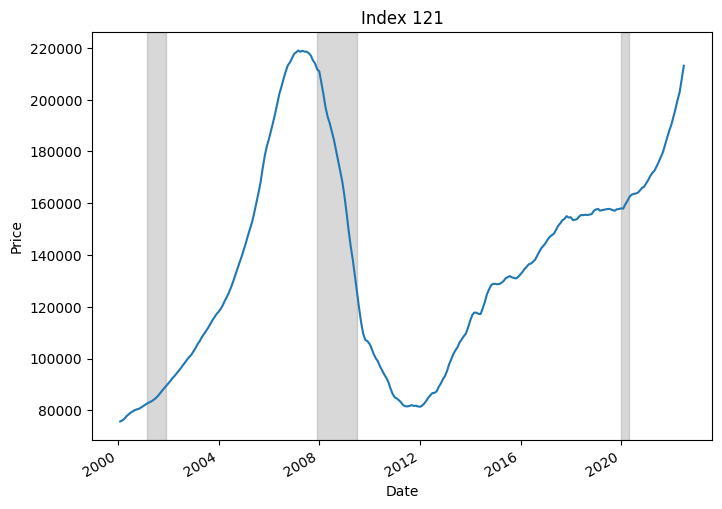

In [10]:
# Plot condo pries

fig, ax = plt.subplots(figsize=(8, 6))

plt.title('Condo Prices - Index 121')
plt.xlabel('Date')
plt.ylabel('Price')

ax.plot(index_121_df.Date, index_121_df.Price)

# Early 2000s Recession
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,30)), 
           label="Early 2000s Recession",color="grey", alpha=0.3)
# Great Recession
ax.axvspan(date2num(datetime(2007,12,1)), date2num(datetime(2009,6,30)), 
           label="Great Recession",color="grey", alpha=0.3)
# COVID-19 Recession
ax.axvspan(date2num(datetime(2020,1,2)), date2num(datetime(2020,4,30)), 
           label="COVID-19 Recession",color="grey", alpha=0.3)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

Text(0.5, 1.0, 'Condo Prices - Index 121 (Two Side View)')

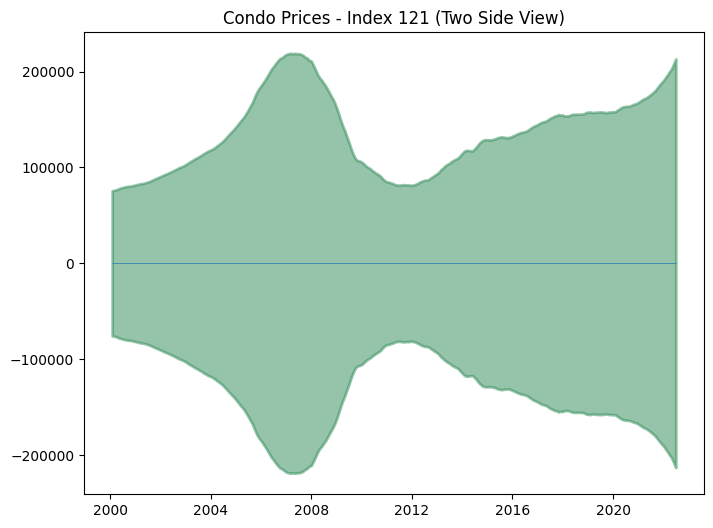

In [16]:
# Two-side view to emphasize growth

x = index_121_df.Date.values
y1 = index_121_df.Price.values

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Condo Prices - Index 121 (Two Side View)')
plt.hlines(y=0, xmin=np.min(index_121_df.Date), xmax=np.max(index_121_df.Date), linewidth=.5)
plt.show()

,Date,Price,year,month
0,2000-01-31,75689.0,2000,Jan
1,2000-02-29,76063.0,2000,Feb
2,2000-03-31,76690.0,2000,Mar
3,2000-04-30,77655.0,2000,Apr
4,2000-05-31,78405.0,2000,May


<Figure size 1280x960 with 0 Axes>

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 90434.0, '2001')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 102803.0, '2002')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 118070.0, '2003')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 142111.0, '2004')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 184895.0, '2005')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 217724.0, '2006')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 210940.0, '2007')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 162740.0, '2008')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 105638.0, '2009')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 84971.0, '2010')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 81349.0, '2011')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 93312.0, '2012')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 114587.0, '2013')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 128864.0, '2014')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 132570.0, '2015')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 144682.0, '2016')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 154577.0, '2017')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 157563.0, '2018')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 158040.0, '2019')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 167706.0, '2020')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(11.1, 190355.0, '2021')

/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_21283/2355111880.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])


Text(5.1, 213124.0, '2022')

[Text(0, 0.5, 'Prices'), Text(0.5, 0, 'Month')]

Text(0.5, 1.0, 'Seasonal Plot of Condo Prices (Index 121) Series')

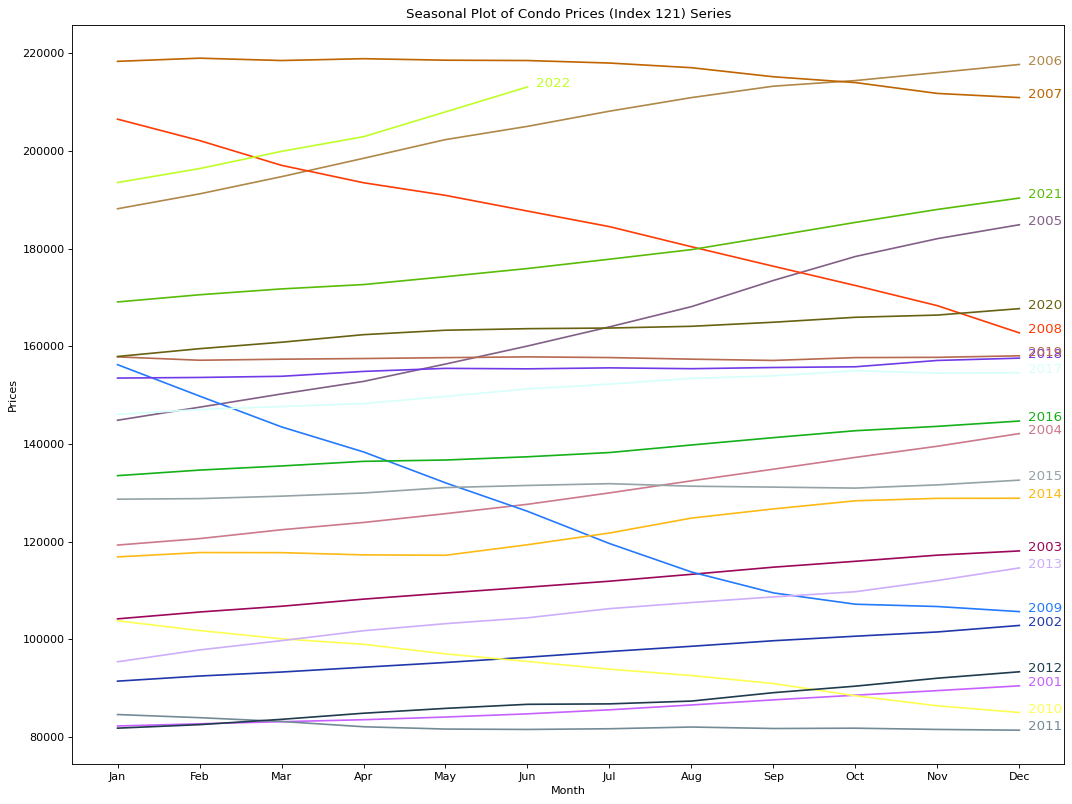

In [59]:
# Seasonal Plot

# Prepare data
index_121_df['year'] = [d.year for d in index_121_df.Date]
index_121_df['month'] = [d.strftime('%b') for d in index_121_df.Date]
years = index_121_df['year'].unique()

index_121_df.head(5)

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Price', data=index_121_df.loc[index_121_df.year==y, :], color=mycolors[i], label=y)
        plt.text(index_121_df.loc[index_121_df.year==y, :].shape[0]-.9, index_121_df.loc[index_121_df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='Prices', xlabel='Month')
plt.title("Seasonal Plot of Condo Prices (Index 121) Series")
plt.show()

<AxesSubplot: xlabel='year', ylabel='Price'>

<AxesSubplot: xlabel='month', ylabel='Price'>

Text(0.5, 1.0, 'Year-wise Box Plot\n(The Trend)')

[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022')]

Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

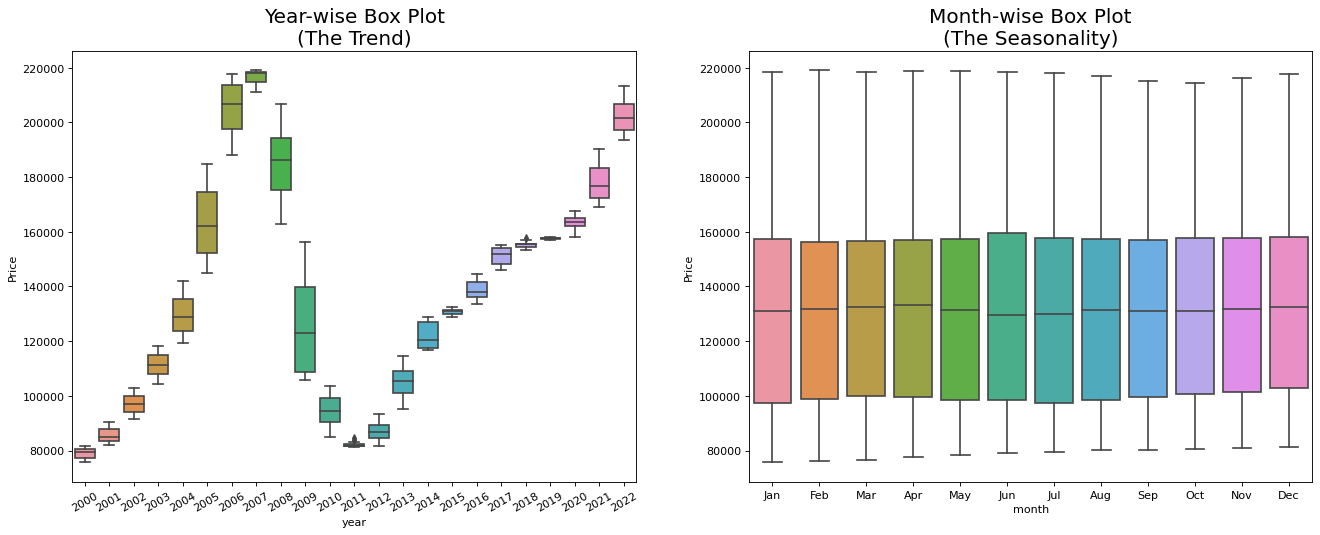

In [36]:
# Box Plots

# Prepare data
index_121_df['year'] = [d.year for d in index_121_df.Date]
index_121_df['month'] = [d.strftime('%b') for d in index_121_df.Date]
years = index_121_df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price', data=index_121_df, ax=axes[0])
sns.boxplot(x='month', y='Price', data=index_121_df.loc[~index_121_df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=30)

axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Text(0.5, 0.98, 'Additive Decompose')

Text(0.5, 0.98, 'Multiplicative Decompose')

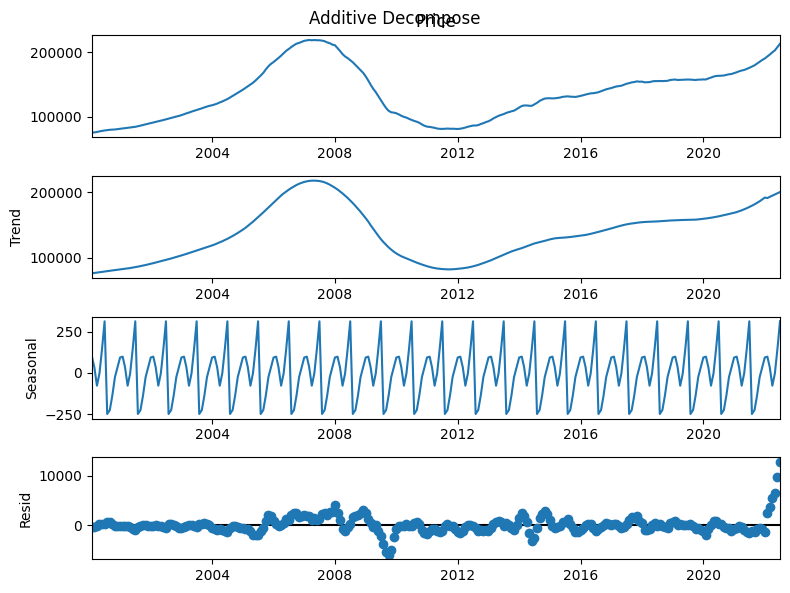

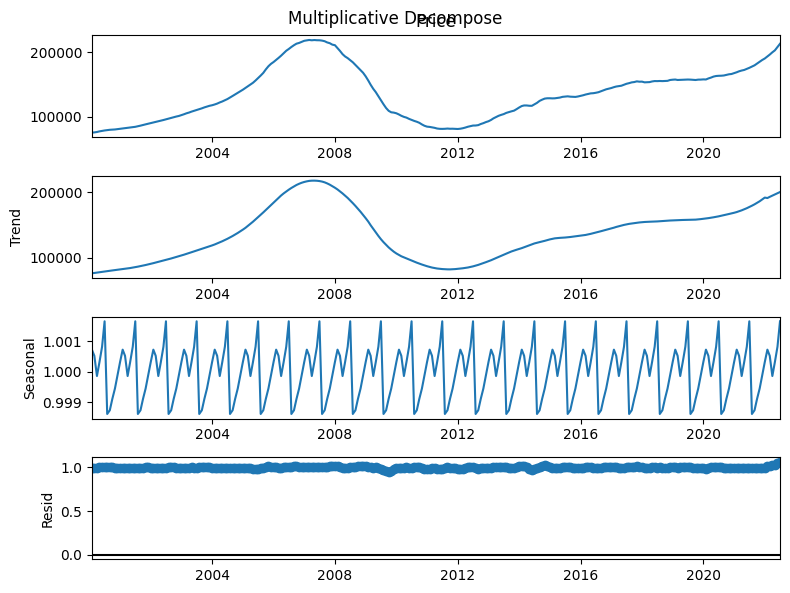

In [62]:
# Decompose - monthly

index121_df = index_121_df.set_index('Date').asfreq('m')

# Additive Decomposition
result_add = seasonal_decompose(index121_df.Price, model='additive', extrapolate_trend='freq')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(index121_df['Price'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,6)})
result_add.plot().suptitle('Additive Decompose')
result_mul.plot().suptitle('Multiplicative Decompose')
plt.show()

Text(0.5, 0.98, 'Additive Decompose')

Text(0.5, 0.98, 'Multiplicative Decompose')

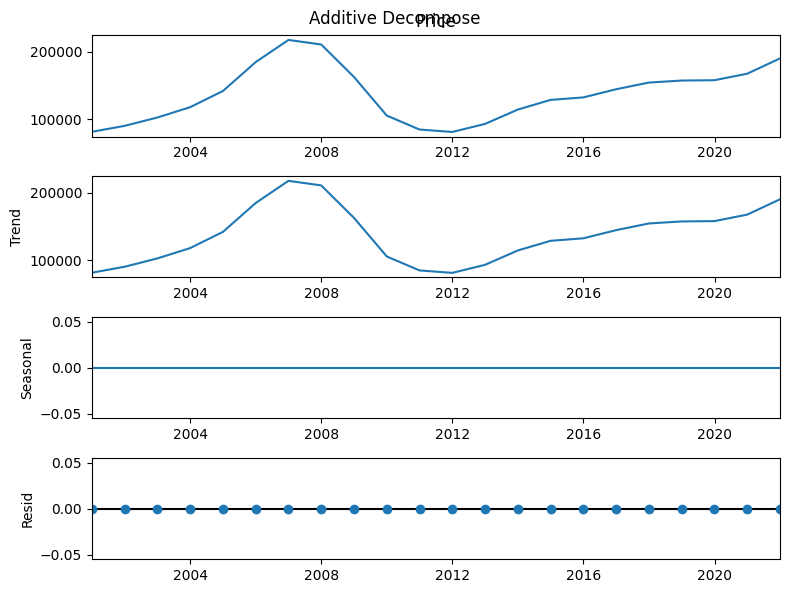

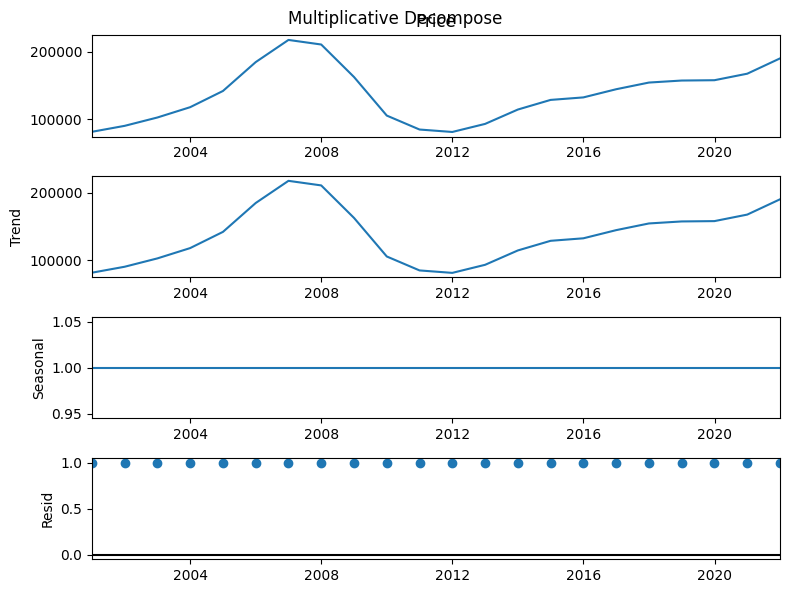

In [63]:
# Decompose - yearly

index121_df = index_121_df.set_index('Date').asfreq('y')

# Additive Decomposition
result_add = seasonal_decompose(index121_df.Price, model='additive', extrapolate_trend='freq')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(index121_df['Price'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,6)})
result_add.plot().suptitle('Additive Decompose')
result_mul.plot().suptitle('Multiplicative Decompose')
plt.show()

<AxesSubplot: >

Text(0.5, 1.0, 'Condo Index 121 - Histogram')

Text(0.5, 0, 'Price')

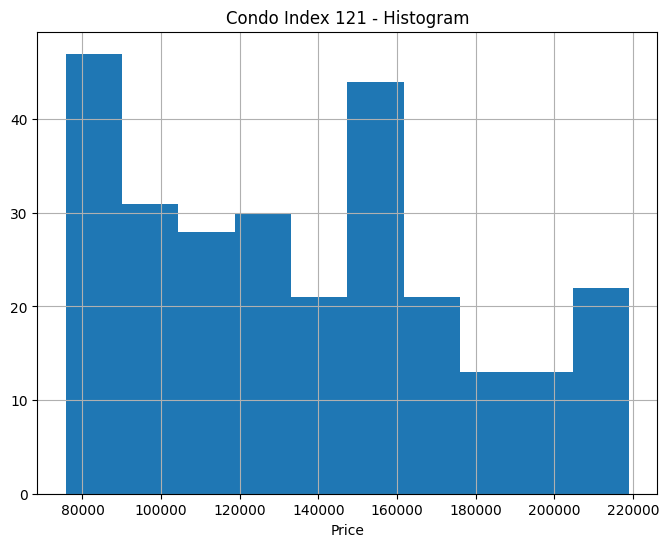

In [74]:
# Histogram of prices
index_121_df.Price.hist()
plt.title('Condo Index 121 - Histogram')
plt.xlabel('Price')
plt.show()

In [69]:
# Stats
X = index_121_df.Price
split = len(X) / 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

TypeError: cannot do slice indexing on RangeIndex with these indexers [135.0] of type float

<AxesSubplot: >

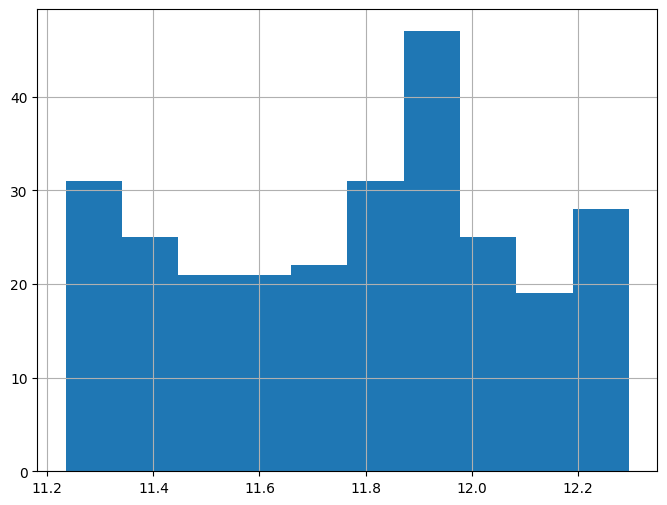

In [71]:
# Histogram of prices
from numpy import log
log_prices = log(index_121_df.Price)
log_prices.hist()

Text(0.5, 1.0, 'Condo Prices - Index 121')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

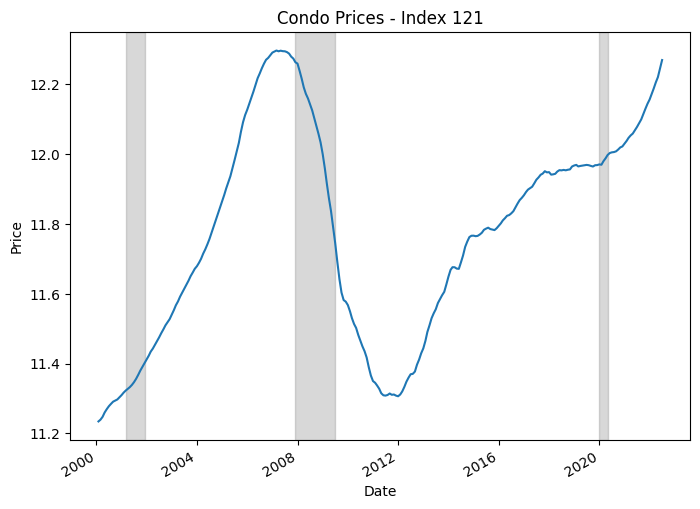

In [76]:
# Plot condo pries

fig, ax = plt.subplots(figsize=(8, 6))

log_prices = index_121_df
log_prices.Price = log(index_121_df.Price)

plt.title('Condo Prices - Index 121')
plt.xlabel('Date')
plt.ylabel('Price')

ax.plot(log_prices.Date, log_prices.Price)

# Early 2000s Recession
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,30)), 
           label="Early 2000s Recession",color="grey", alpha=0.3)
# Great Recession
ax.axvspan(date2num(datetime(2007,12,1)), date2num(datetime(2009,6,30)), 
           label="Great Recession",color="grey", alpha=0.3)
# COVID-19 Recession
ax.axvspan(date2num(datetime(2020,1,2)), date2num(datetime(2020,4,30)), 
           label="COVID-19 Recession",color="grey", alpha=0.3)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()